In [1]:
from scipy.fftpack import fft,ifft
import numpy as np  
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


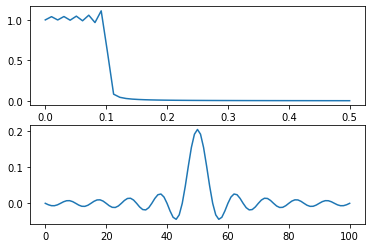

In [92]:
N = 101
T = 1.0 / 44100.0
cutoff = 4410.0
SampleRate = 44100
fc = cutoff / SampleRate

n = np.arange(N)
h = np.sinc(2 * fc * (n - (N - 1) / 2)) # * np.blackman(N)
h /= np.sum(h)

H = fft(h)
x_f = np.linspace(0.0, 0.5, N//2)

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(x_f, np.abs(H[:N//2]))

h = ifft(H)
ax2.plot(n, h)


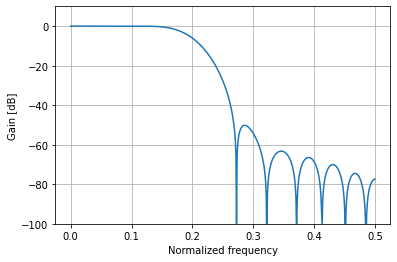

In [71]:
from __future__ import division
 
import numpy as np
import matplotlib.pyplot as plt
 
fc = 0.2  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
N = 25    # Number of coefficients.
L = 1024  # Length of frequency response.
 
# Compute sinc filter with Hamming window.
n = np.arange(N)
h = np.sinc(2 * fc * (n - (N - 1) / 2)) * np.hamming(N)
h /= np.sum(h)
 
# Pad filter with zeros.
h_padded = np.zeros(L)
h_padded[0 : N] = h
 
# Compute frequency response; only keep first half.
H = np.abs(np.fft.fft(h_padded))[0 : L // 2 + 1]
 
# Plot frequency response (in dB).
plt.figure()
plt.plot(np.linspace(0, 0.5, len(H)), 20 * np.log10(H))
plt.xlabel('Normalized frequency')
plt.ylabel('Gain [dB]')
plt.ylim([-100, 10])
plt.grid()
plt.show()